In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [2]:
df = pd.read_csv("CleanedData.csv")
df['Date Added'] = pd.to_datetime(df['Date Added'])
df['LatestExpiration'] = pd.to_datetime(df['LatestExpiration'])
df['PriceStartDate'] = pd.to_datetime(df['PriceStartDate'])

In [3]:
df = df[df["Price"] > 0]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6160
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price                   6013 non-null   float64       
 1   PriceStartDate          6013 non-null   datetime64[ns]
 2   Date Added              6013 non-null   datetime64[ns]
 3   InflationAdjustedPrice  6013 non-null   float64       
 4   Analysis                5992 non-null   object        
 5   P or E                  6013 non-null   object        
 6   Pre2005Flag             6013 non-null   int64         
 7   PreviousPatents         6013 non-null   int64         
 8   LatestExpiration        6013 non-null   datetime64[ns]
 9   MonthsUntilExpiration   6013 non-null   float64       
dtypes: datetime64[ns](3), float64(3), int64(2), object(2)
memory usage: 516.7+ KB


In [5]:
df.describe()

,Price,InflationAdjustedPrice,Pre2005Flag,PreviousPatents,MonthsUntilExpiration
count,6013.000000,6013.000000,6013.000000,6013.000000,6013.000000
mean,1444.396546,600.827533,0.532846,0.757359,100.695327
std,4291.400174,1783.729981,0.498961,8.558563,57.501309
min,0.010000,0.003968,0.000000,0.000000,-6.000000
25%,36.090000,15.053036,0.000000,0.000000,56.000000
50%,141.810000,59.683219,1.000000,0.000000,88.000000
75%,748.070000,312.878826,1.000000,0.000000,153.000000
max,32680.420000,13316.852565,1.000000,119.000000,228.000000


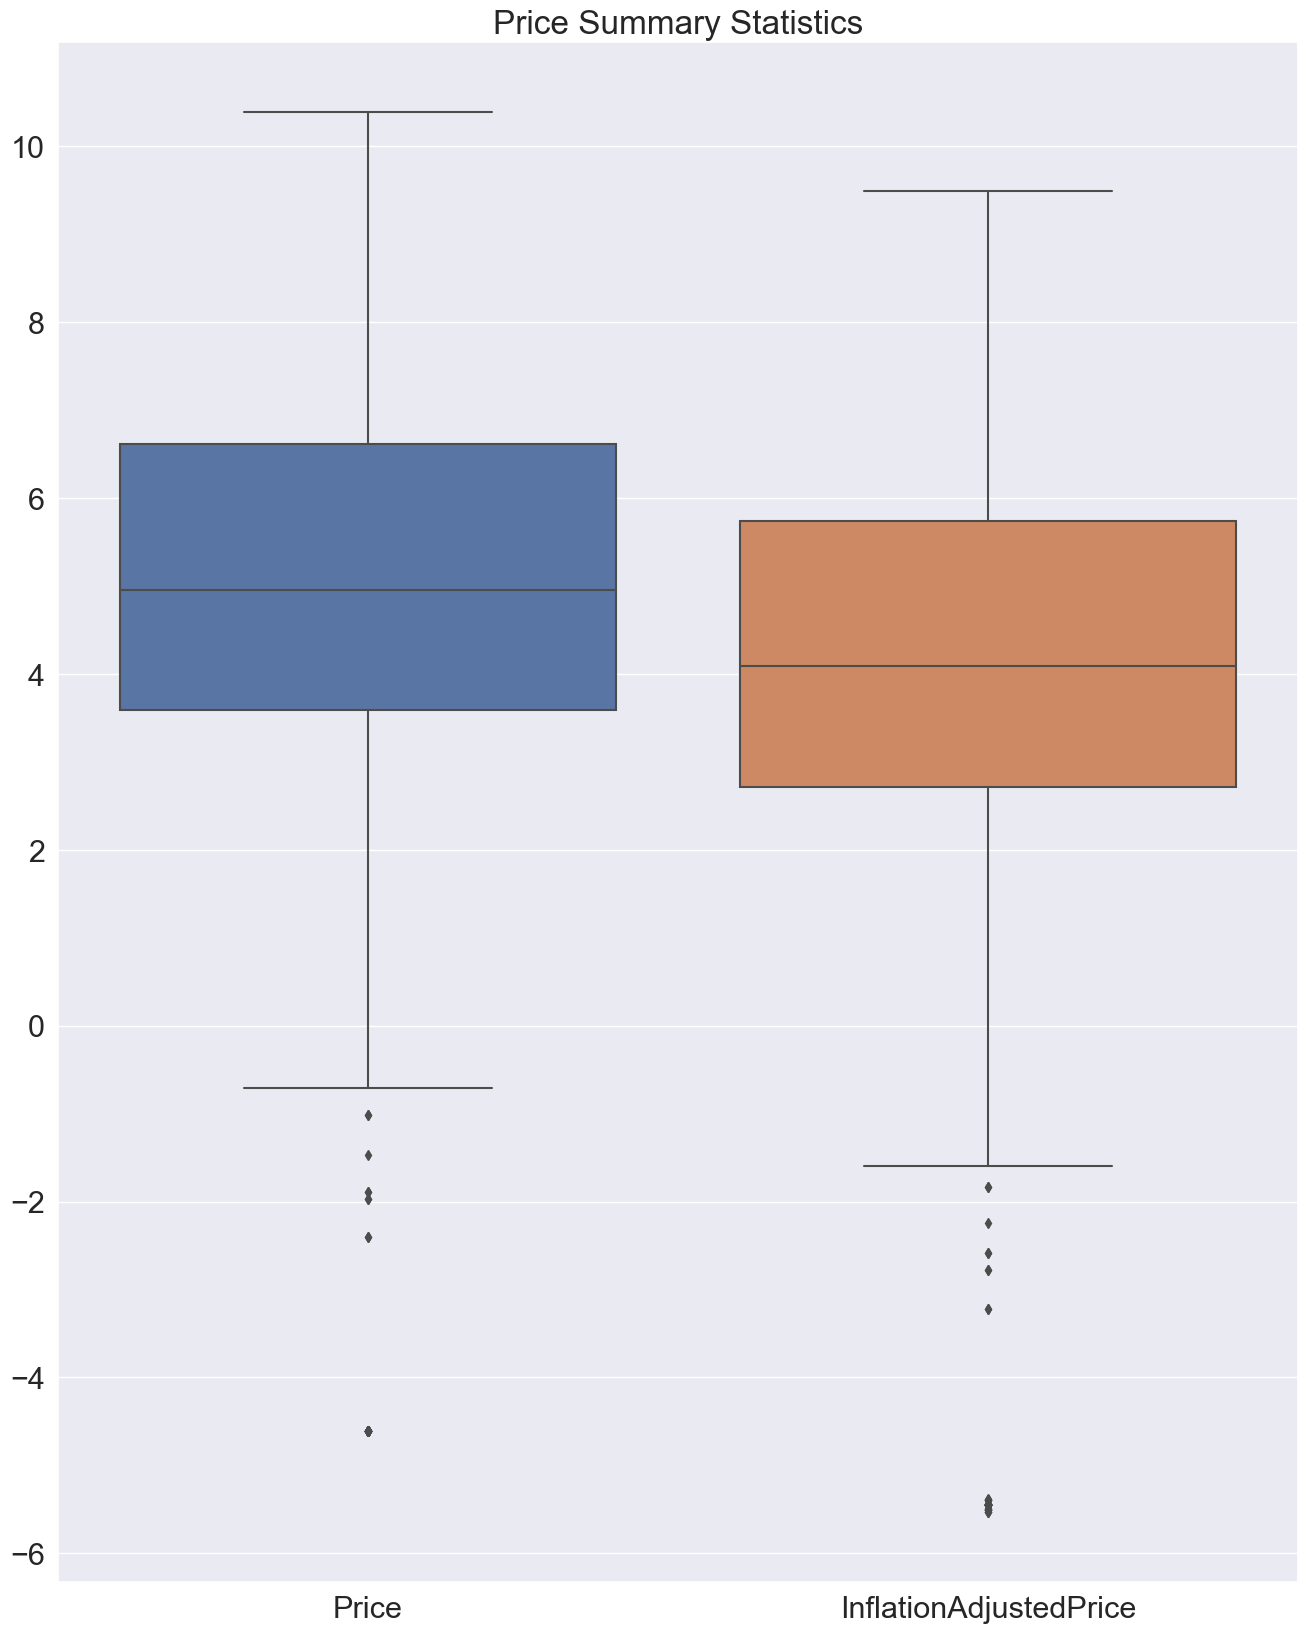

In [6]:
## Log transformed due to skew. Made them look nasty without
plt.figure(figsize=(16,20))
sns.boxplot(np.log(df[['Price',"InflationAdjustedPrice"]]))
plt.title('Price Summary Statistics')
plt.savefig('Plots\PriceBoxPlot.png')
plt.show()

C:\Users\sulli\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\sulli\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


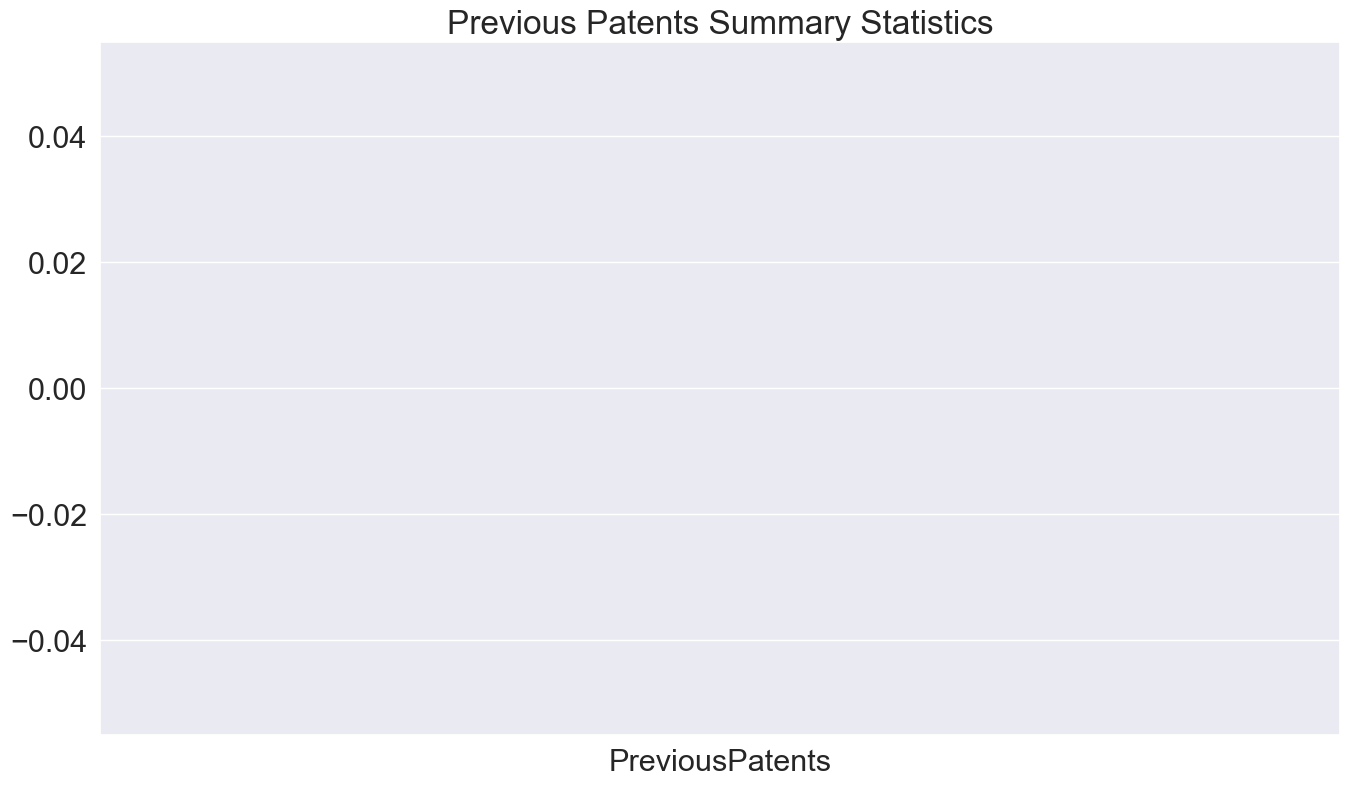

In [7]:
#Log transformed again due to skew, this one may be never needed as it still ugly@
plt.figure(figsize=(16,9))
sns.boxplot(np.log(df[["PreviousPatents"]]))
plt.title('Previous Patents Summary Statistics')
#plt.savefig('Plots\PreviousPatentsBoxPlot.png')
plt.show()

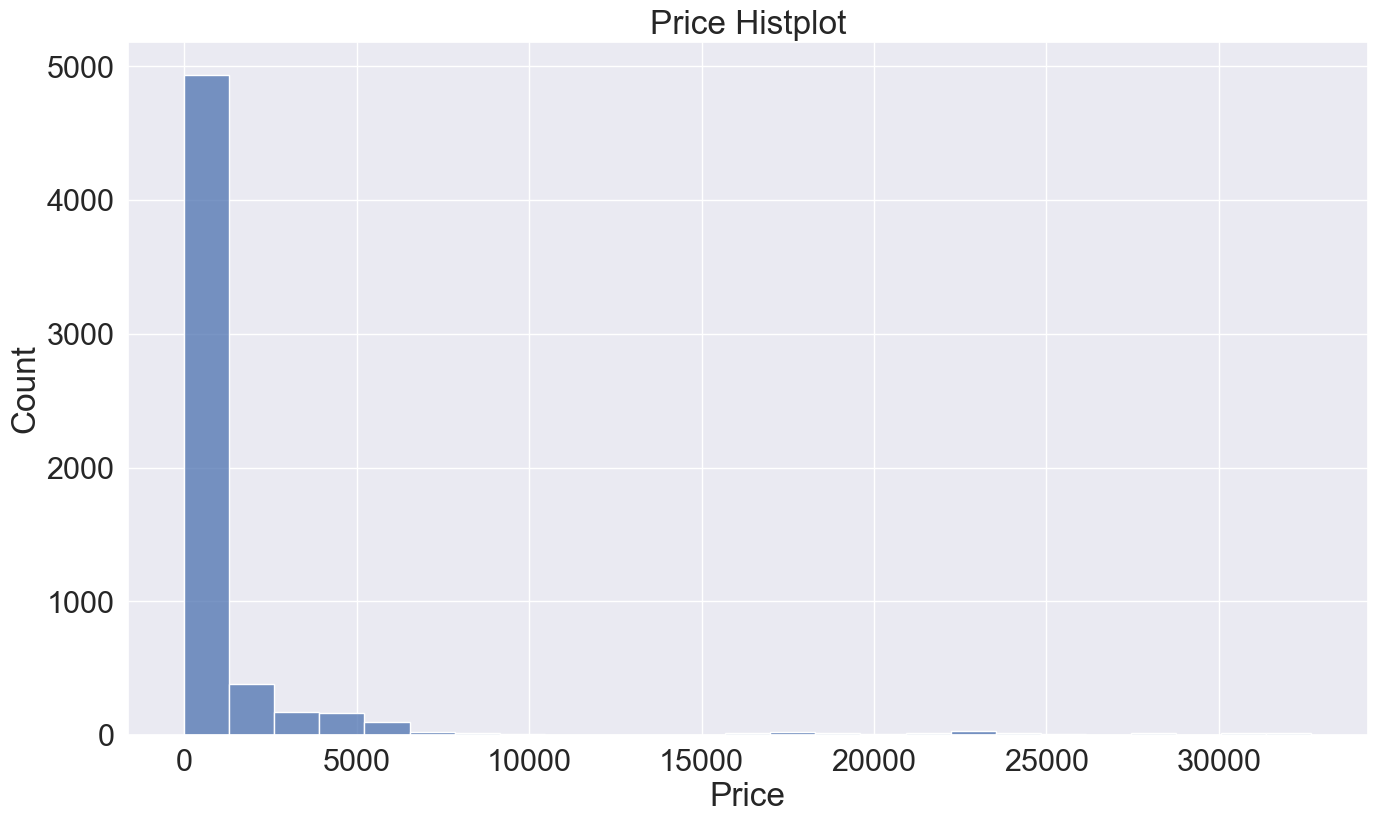

In [8]:
plt.figure(figsize=(16,9))
sns.histplot(df['Price'],bins=25)
plt.title('Price Histplot')
plt.savefig('Plots\PriceHist.png')
plt.show()

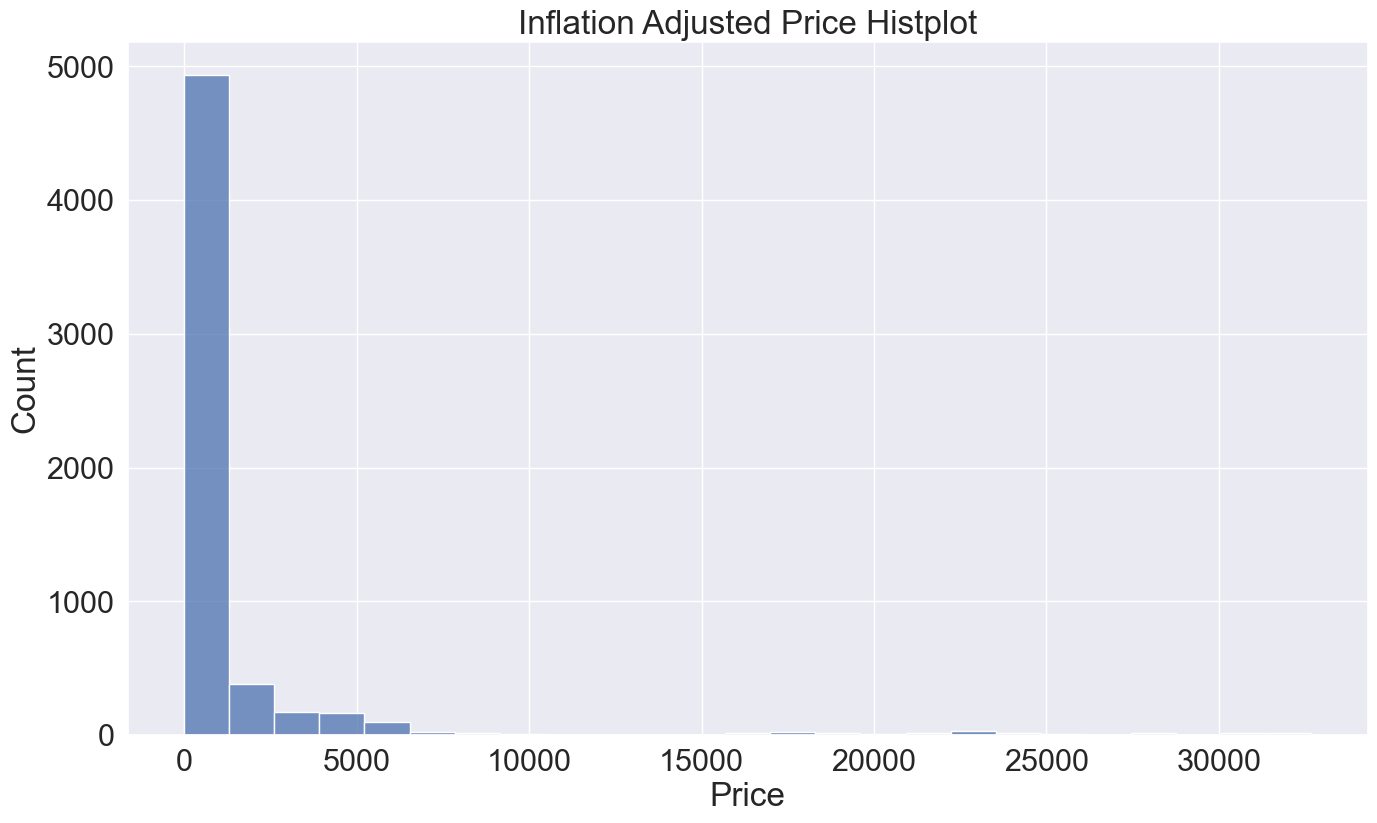

In [9]:
plt.figure(figsize=(16,9))
sns.histplot(df['Price'],bins=25)
plt.title('Inflation Adjusted Price Histplot')
plt.savefig('Plots\InflationAdjustedPriceHist.png')
plt.show()

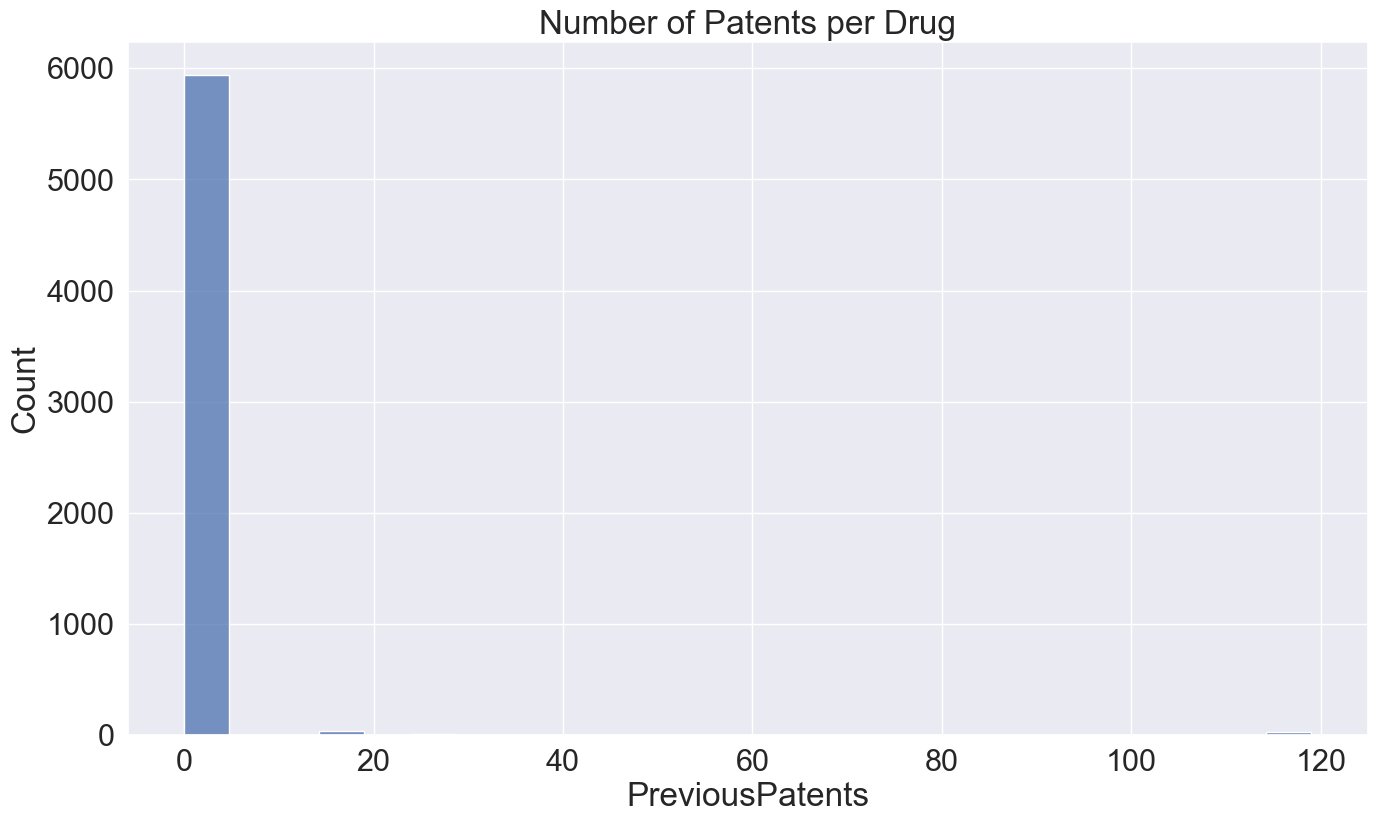

In [10]:
plt.figure(figsize=(16,9))
sns.histplot(df['PreviousPatents'],bins=25)
plt.title('Number of Patents per Drug')
plt.savefig('Plots\PatentNumber.png')
plt.show()

In [11]:
df['Year'] = pd.to_datetime(df['Date Added']).dt.year

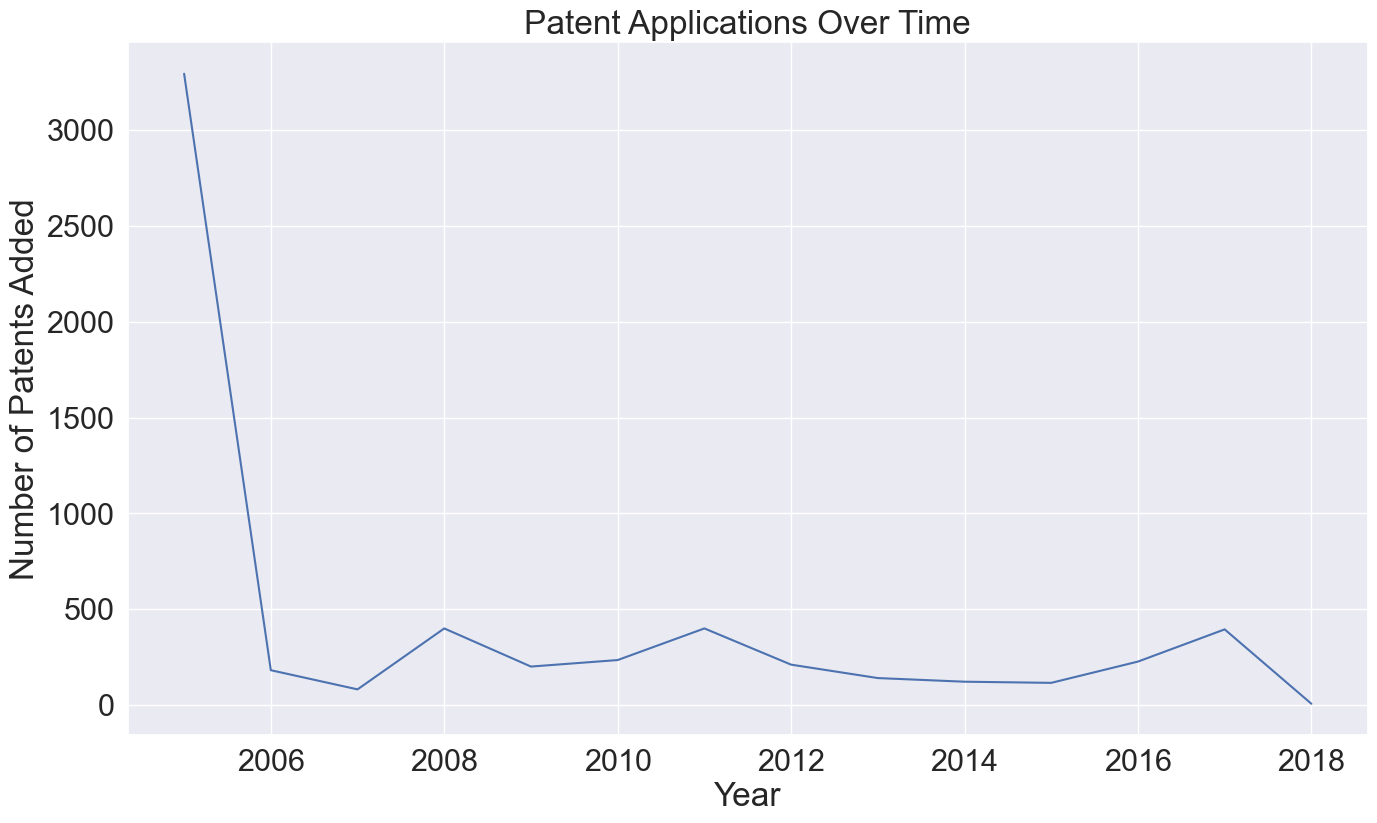

In [12]:
plt.figure(figsize=(16,9))
sns.lineplot(x = df['Year'].unique(),
             y=df.groupby(by='Year')['Year'].count())
plt.title('Patent Applications Over Time')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ApplicationVTime.png')
plt.show()

In [13]:
df['ExtensionYear'] = pd.to_datetime(df['LatestExpiration']).dt.year

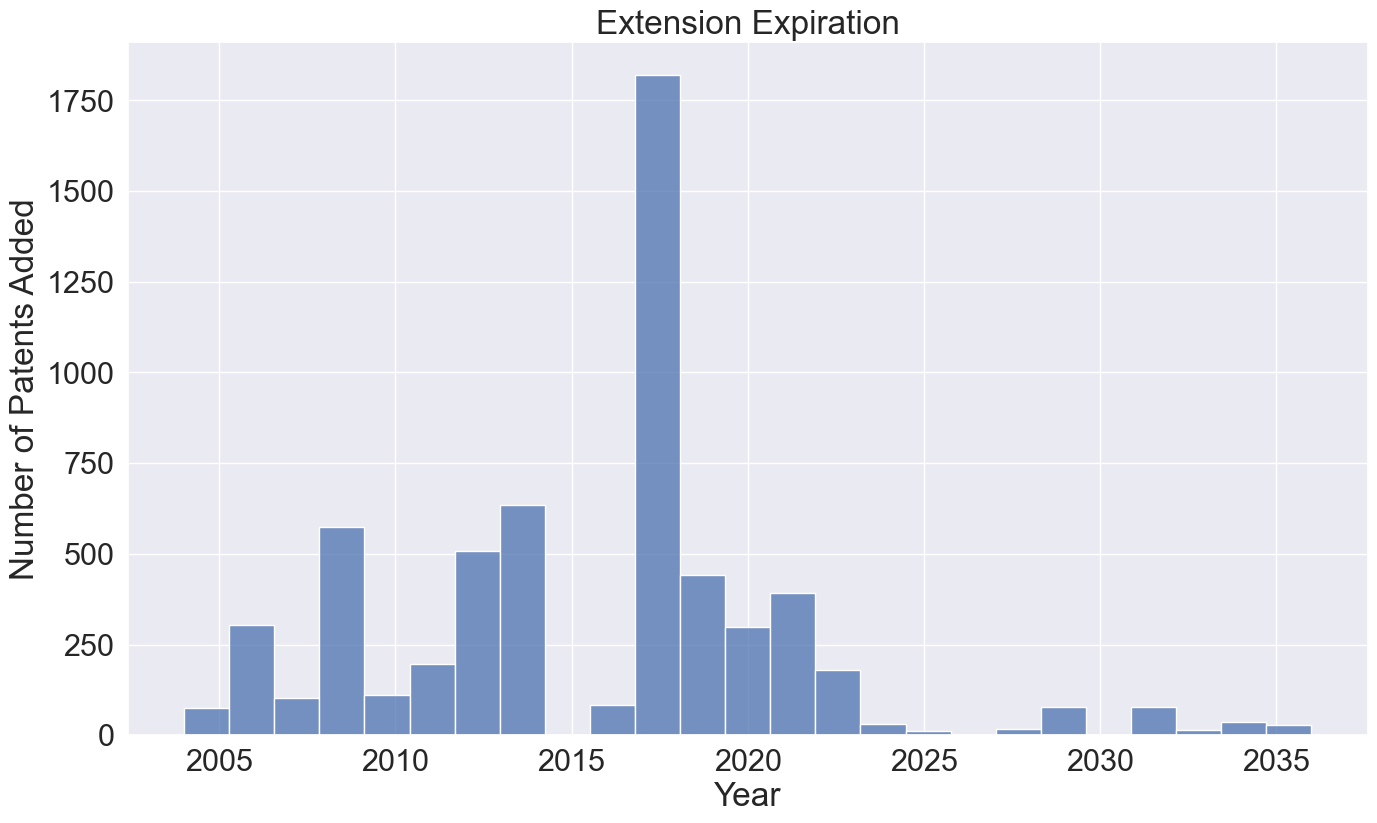

In [14]:
plt.figure(figsize=(16,9))
sns.histplot(df['ExtensionYear'],bins=25)
plt.title('Extension Expiration')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ExtensionsVTime.png')
plt.show()

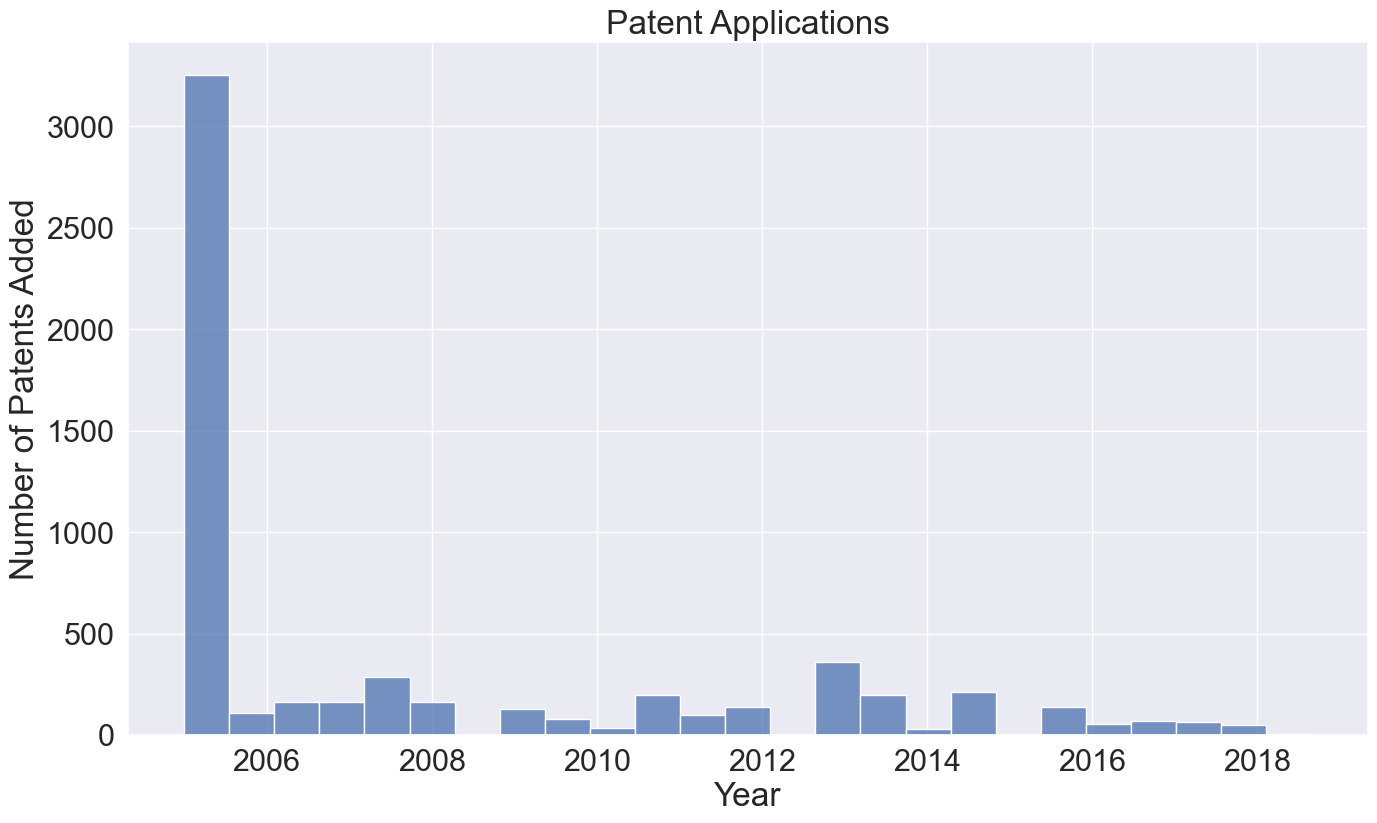

In [15]:
plt.figure(figsize=(16,9))
sns.histplot(df['Date Added'],bins=25)
plt.title('Patent Applications')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ApplicationVTime.png')
plt.show()

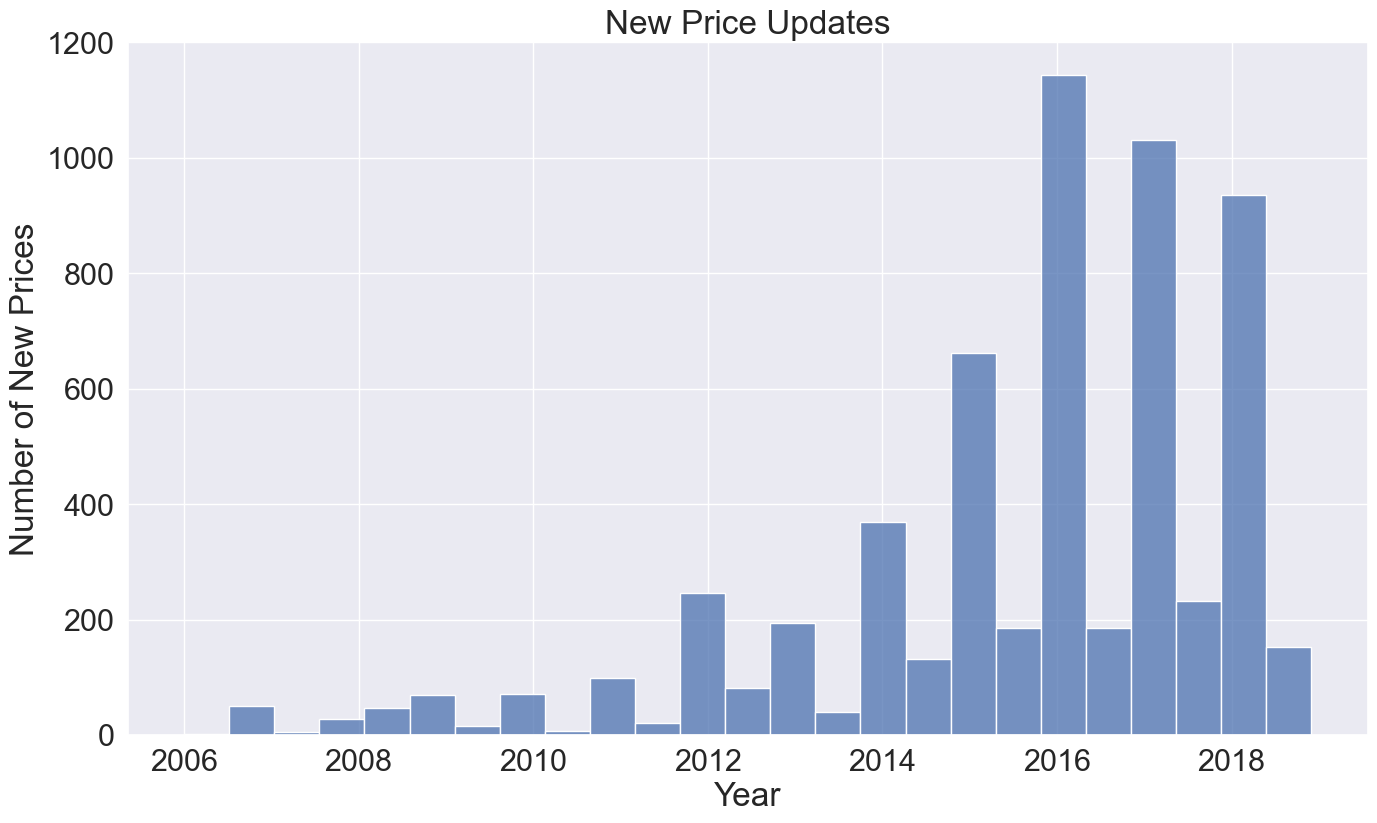

In [16]:
plt.figure(figsize=(16,9))
sns.histplot(df['PriceStartDate'],bins=25)
plt.title('New Price Updates')
plt.ylabel('Number of New Prices')
plt.xlabel('Year')
plt.savefig('Plots\PriceStartVTime.png')
plt.show()

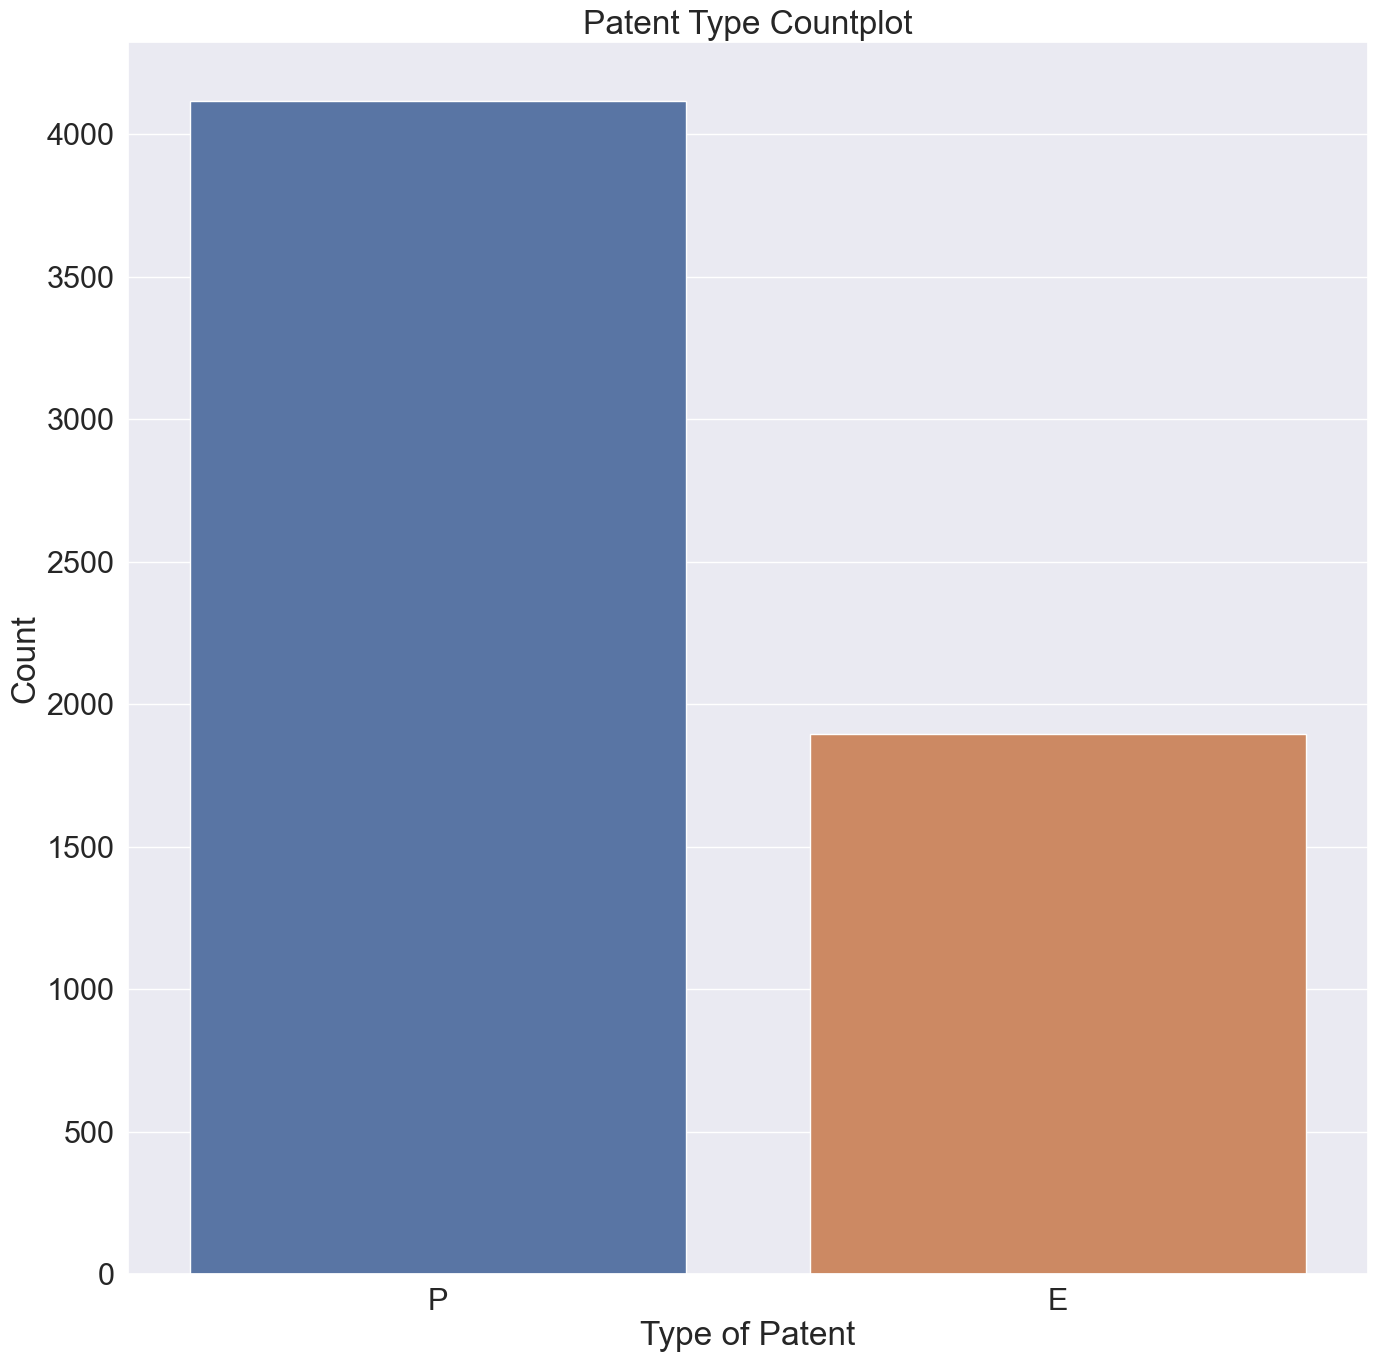

In [17]:
plt.figure(figsize=(16,9))
sns.countplot(x =df['P or E'])
plt.title('Patent Type Countplot')
plt.xlabel('Type of Patent')
plt.ylabel('Count')
plt.savefig('Plots\PatentTypes.png')
plt.show()

In [18]:
list(df['P or E'].value_counts(normalize=True) *100)

[68.46831864294029, 31.531681357059703]

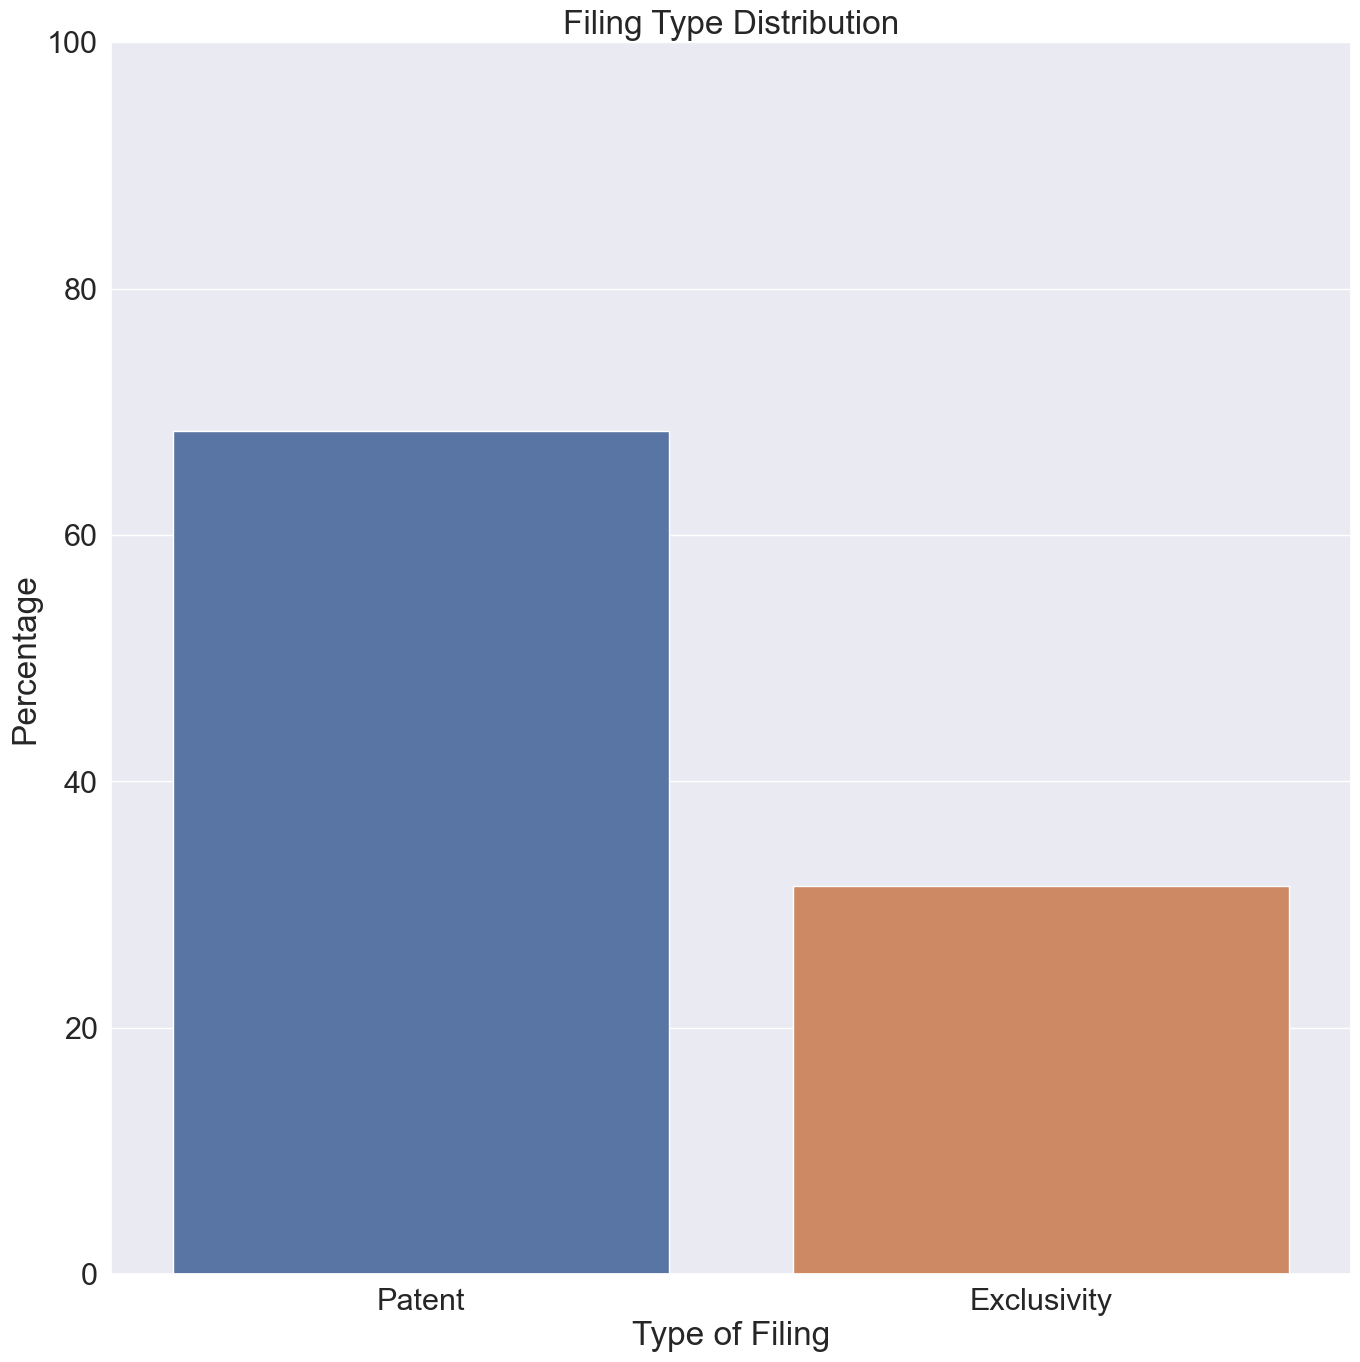

In [19]:
plt.figure(figsize=(16,16))
sns.barplot(x=['Patent','Exclusivity'],
              y=list(df['P or E'].value_counts(normalize=True)*100))
plt.title('Filing Type Distribution')
plt.xlabel('Type of Filing')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.savefig('Plots\PatentTypesBarplot.png')
plt.show()

In [20]:
df['P or E'].value_counts(normalize=True)

P    0.684683
E    0.315317
Name: P or E, dtype: float64

In [21]:
df['Analysis'].value_counts()

Pre-2005         3204
NCE               944
P:DP              527
P:DS/DP           175
NP                169
ODE               153
NDF               137
P:UCnew           130
P:DS              116
P:DS/DP/UCnew     101
M                  99
P:DP/UCnew         77
NE                 65
NS                 40
P:DS/UCnew         37
P:UC               18
Name: Analysis, dtype: int64

<AxesSubplot:xlabel='PreviousPatents', ylabel='InflationAdjustedPrice'>

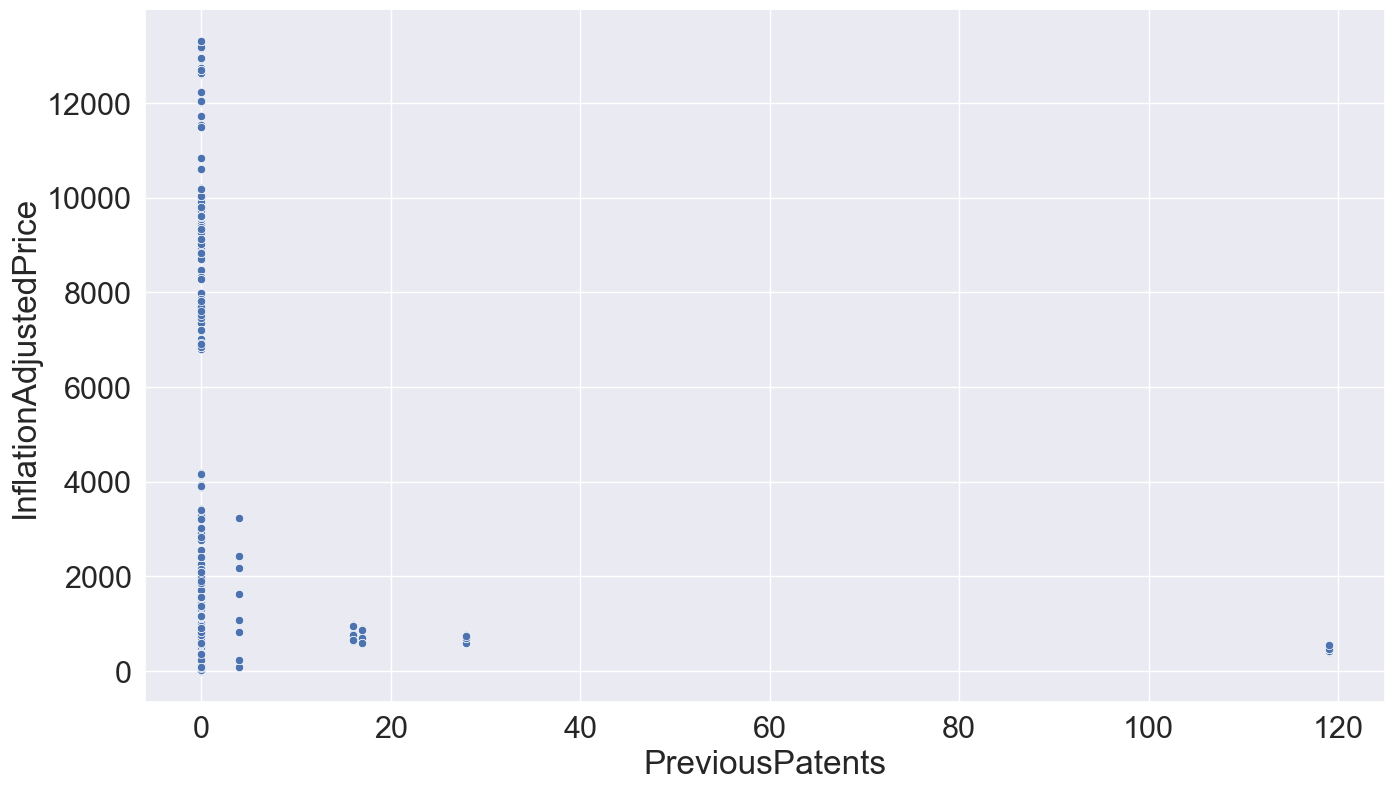

In [22]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df['PreviousPatents'],y=df['InflationAdjustedPrice'])

# Cleaning

In [23]:
df["Price"].value_counts()

2975.01    44
0.01       38
135.44     35
92.34      35
82.59      30
           ..
81.70       1
328.17      1
330.96      1
355.69      1
10.26       1
Name: Price, Length: 1537, dtype: int64

In [24]:
## drop those with -1 as a price 
df = df[df["Price"] > -1]

In [25]:
df["Price"].value_counts()

2975.01    44
0.01       38
135.44     35
92.34      35
82.59      30
           ..
81.70       1
328.17      1
330.96      1
355.69      1
10.26       1
Name: Price, Length: 1537, dtype: int64

In [26]:
## create dummies
dumdums = pd.get_dummies(df[['Analysis','P or E']])

df.drop(columns = ["Analysis", "P or E"], inplace = True)

df = df.join(dumdums)

df

,Price,PriceStartDate,Date Added,InflationAdjustedPrice,Pre2005Flag,PreviousPatents,LatestExpiration,MonthsUntilExpiration,Year,ExtensionYear,...,Analysis_P:DP/UCnew,Analysis_P:DS,Analysis_P:DS/DP,Analysis_P:DS/DP/UCnew,Analysis_P:DS/UCnew,Analysis_P:UC,Analysis_P:UCnew,Analysis_Pre-2005,P or E_E,P or E_P
0,270.50,2007-01-01,2005-01-01,133.646245,1,0,2017-07-25,150.0,2005,2017,...,0,0,0,0,0,0,0,1,0,1
1,270.50,2007-01-01,2005-01-01,133.646245,1,0,2017-07-25,150.0,2005,2017,...,0,0,0,0,0,0,0,1,0,1
2,277.97,2008-01-01,2005-01-01,131.676930,1,0,2017-07-25,150.0,2005,2017,...,0,0,0,0,0,0,0,1,0,1
3,278.67,2008-04-01,2005-01-01,129.734637,1,0,2017-07-25,150.0,2005,2017,...,0,0,0,0,0,0,0,1,0,1
4,278.67,2008-04-01,2005-01-01,129.734637,1,0,2017-07-25,150.0,2005,2017,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,2919.60,2018-07-15,2005-01-01,1158.543844,1,0,2019-10-22,177.0,2005,2019,...,0,0,0,0,0,0,0,1,0,1
6157,20.73,2018-11-09,2005-01-01,8.224950,1,0,2018-08-14,163.0,2005,2018,...,0,0,0,0,0,0,0,1,0,1
6158,142.75,2018-11-09,2005-01-01,56.638285,1,0,2018-08-14,163.0,2005,2018,...,0,0,0,0,0,0,0,1,0,1
6159,177.38,2018-12-01,2006-07-28,70.603782,0,0,2019-09-28,158.0,2006,2019,...,0,0,0,0,0,0,0,0,0,1


In [27]:
corr = df.select_dtypes(exclude = "datetime").drop(columns = "InflationAdjustedPrice").corr()

In [28]:
# Wanted to see what features would automatically stick out to look at for possible price relation
# Nothing really good
price_cor = abs(corr["Price"])
price_cor

Price                     1.000000
Pre2005Flag               0.305629
PreviousPatents           0.001980
MonthsUntilExpiration     0.056813
Year                      0.381111
ExtensionYear             0.207564
Analysis_M                0.035009
Analysis_NCE              0.308855
Analysis_NDF              0.044529
Analysis_NE               0.024115
Analysis_NP               0.049028
Analysis_NS               0.019429
Analysis_ODE              0.246029
Analysis_P:DP             0.049750
Analysis_P:DP/UCnew       0.032766
Analysis_P:DS             0.004575
Analysis_P:DS/DP          0.003941
Analysis_P:DS/DP/UCnew    0.201048
Analysis_P:DS/UCnew       0.019790
Analysis_P:UC             0.005233
Analysis_P:UCnew          0.009425
Analysis_Pre-2005         0.305629
P or E_E                  0.270035
P or E_P                  0.270035
Name: Price, dtype: float64

In [29]:
# Goofin around 
prevPatents_cor = abs(corr["PreviousPatents"])
prevPatents_cor

Price                     0.001980
Pre2005Flag               0.094516
PreviousPatents           1.000000
MonthsUntilExpiration     0.001510
Year                      0.228498
ExtensionYear             0.147223
Analysis_M                0.011450
Analysis_NCE              0.038191
Analysis_NDF              0.013513
Analysis_NE               0.009251
Analysis_NP               0.015050
Analysis_NS               0.007242
Analysis_ODE              0.014300
Analysis_P:DP             0.027429
Analysis_P:DP/UCnew       0.606958
Analysis_P:DS             0.012412
Analysis_P:DS/DP          0.006999
Analysis_P:DS/DP/UCnew    0.080374
Analysis_P:DS/UCnew       0.006964
Analysis_P:UC             0.097597
Analysis_P:UCnew          0.011018
Analysis_Pre-2005         0.094516
P or E_E                  0.060057
P or E_P                  0.060057
Name: PreviousPatents, dtype: float64